**Question 1**: Given some sample data, write a program to answer the following: <a href="https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0">click here to access the required data set</a>

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


In [51]:
import pandas as pd

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Sanity checking the information that was given
- [X] 100 sneaker shops
- [X] Data is over a 30 day window
- [X] AOV of $3145.13

In [3]:
len(df["shop_id"].unique()) # ✅ 100 unique sneaker shops

100

In [12]:
df["created_at"].min(), df["created_at"].max() # ✅ data spans the 30 day period of 3/1/2017 - 3/30/17

('2017-03-01 0:08:09', '2017-03-30 9:55:00')

In [54]:
sum(df["order_amount"])/len(df["order_id"]) # ✅ Naive AOV of $3145.13 aka mean

3145.128

### Let's see what's going on

In [18]:
import seaborn as sns

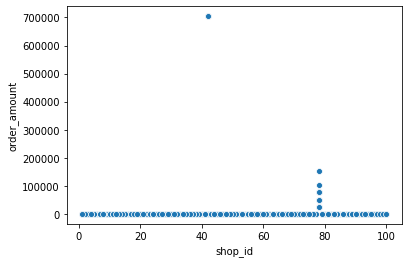

In [20]:
# I'll start off by graphing the data to see if there are outliers.

sns.scatterplot(data=df, x="shop_id", y="order_amount") # There's definitely outliers! Several orders totaling over $100k

In [34]:
pd.set_option('display.max_rows', 100)

In [36]:
# I want to isolate the outliers to get an idea of what's going on.
df_over_10k = df[df["order_amount"] >= 10000]
len(df_over_10k)

63

In [37]:
df_over_10k.sort_values(by = "order_amount", ascending = False).head(63)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


#### Observations
- A handful of these outliers have items that cost over \\$10k each. Those are very expensive shoes!
- These outliers are limited to 2 shops: 42 & 78
- There were customers that paid \\$51,450 in cash for their shoes. Not useful. Just funny! Assuming USD currency that's 514 \\$100 bill and 1 \\$50 totaling over 1 lb of cash and roughly the size of 7 stacked iPhone Xs.

In [44]:
# Hypothesis 1: Shop 42 and 78 only had sales that were outliers. If so, they could possibly be dropped
df_shop_42 = df[df["shop_id"] == 42]
df_shop_42.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


In [48]:
df_shop_78 = df[df["shop_id"] == 78]
df_shop_78.head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


### What metric to use instead
**NOTE:** The prompt is a bit vague as to what is trying to be accomplished so I’m going to assume that Shopify is trying to find the average of the order value without these outliers

In [58]:
# My initial thought was to use the median
df["order_amount"].median()

284.0

In [61]:
# I also investigated the idea of a trimmed mean. Cutting off the top and bottom 3% as we know that there are 63/5000 significant outliers
from scipy import stats
stats.trim_mean(df["order_amount"], proportiontocut=0.03)

298.90574468085106

In [60]:
# However, trimmed mean was rejected as it seemed that there was useful data at the bottom. $90 isn't an unheard of low-end price for shoes
df["order_amount"].min()

90